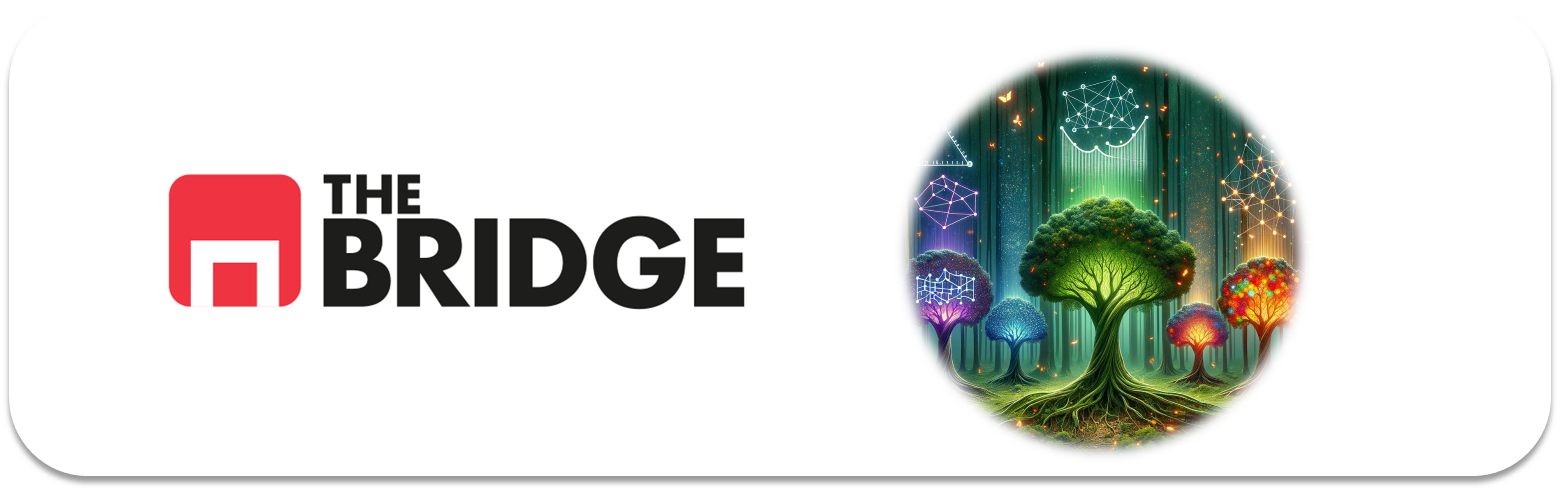

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("deep")

import bootcampviztools as bt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [23]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menos tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [24]:
df = pd.read_csv(url, names = names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
target = "class"

In [27]:
df[target].value_counts(normalize=True)

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

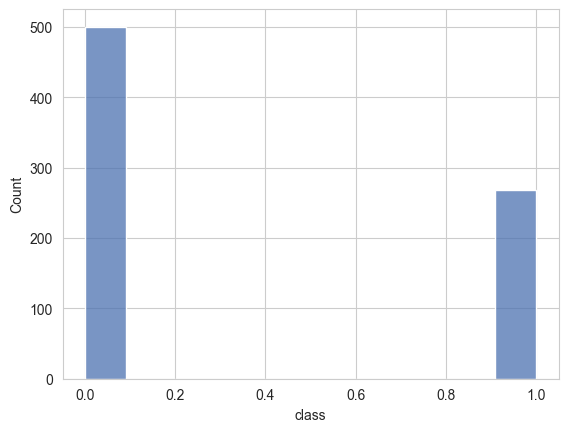

In [28]:
sns.histplot(df[target]);

In [29]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(614, 9)
(154, 9)


In [30]:
train.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,69.415309,20.399023,81.438111,31.983388,0.469168,32.907166,0.346906
std,3.313264,32.035057,18.512599,15.433974,116.234835,7.740625,0.336847,11.503437,0.476373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
num_col = train.columns.tolist()
num_col.remove(target)

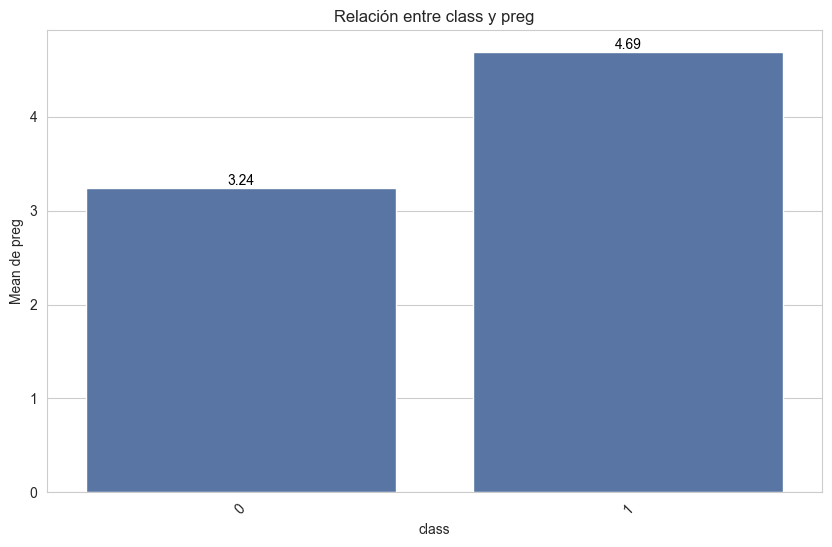

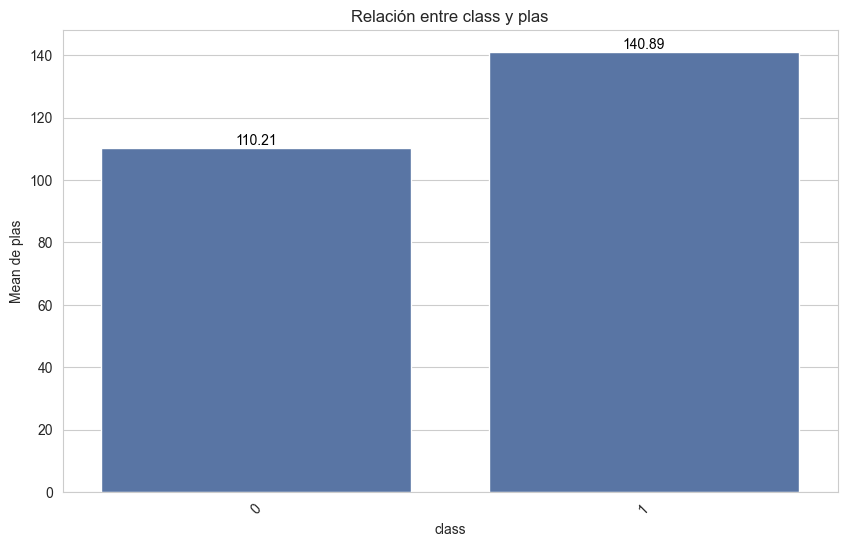

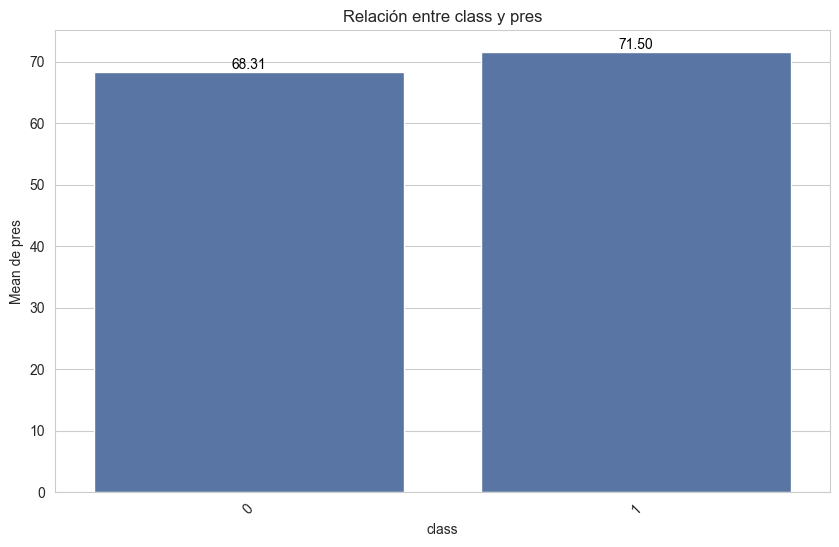

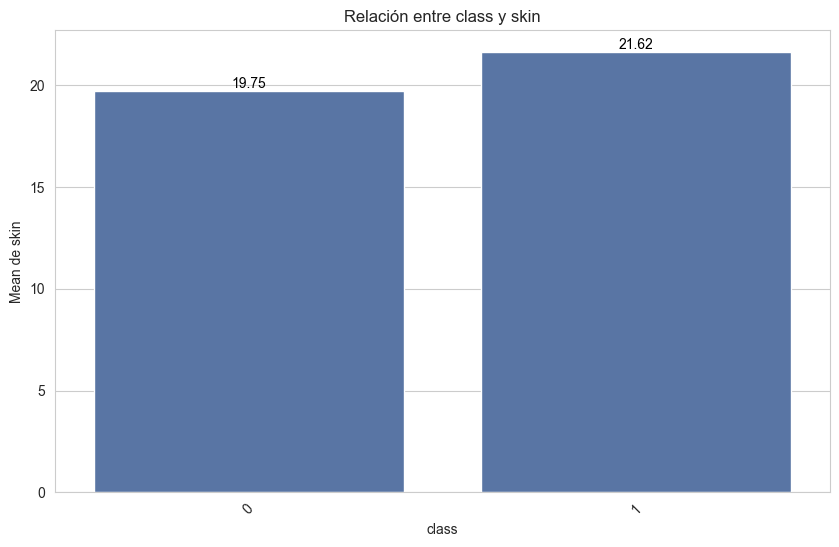

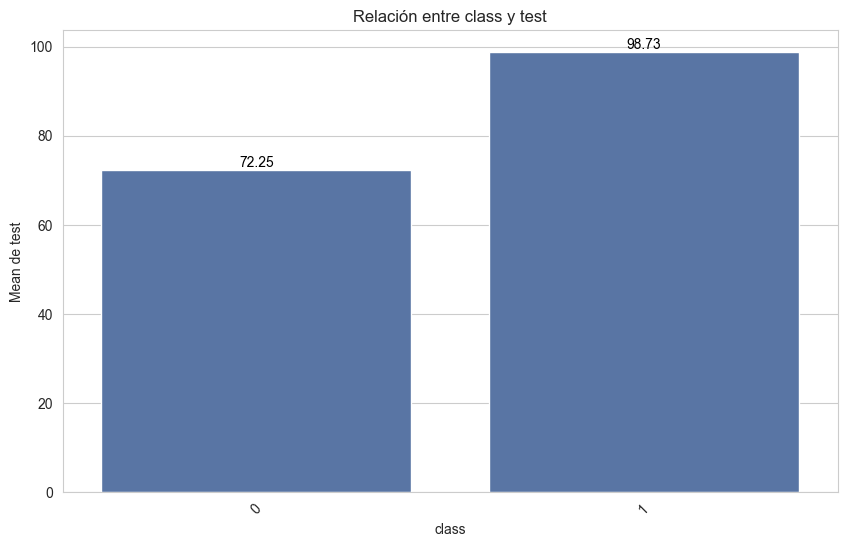

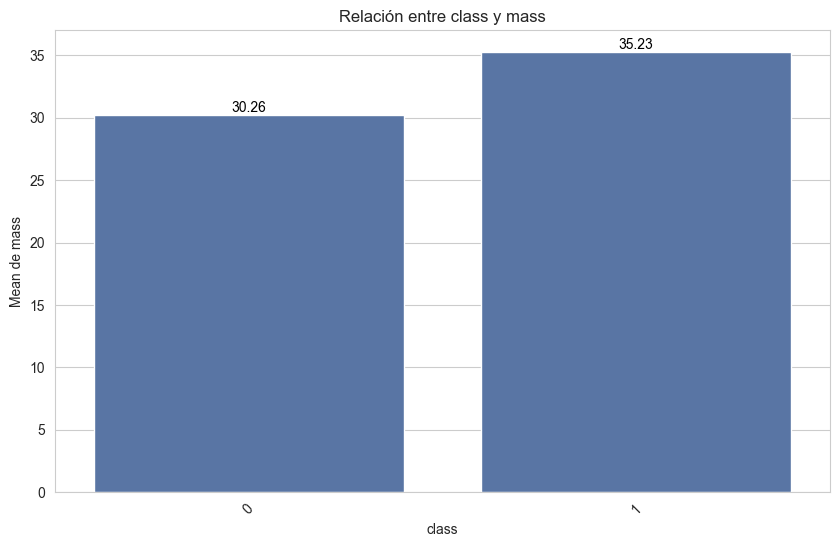

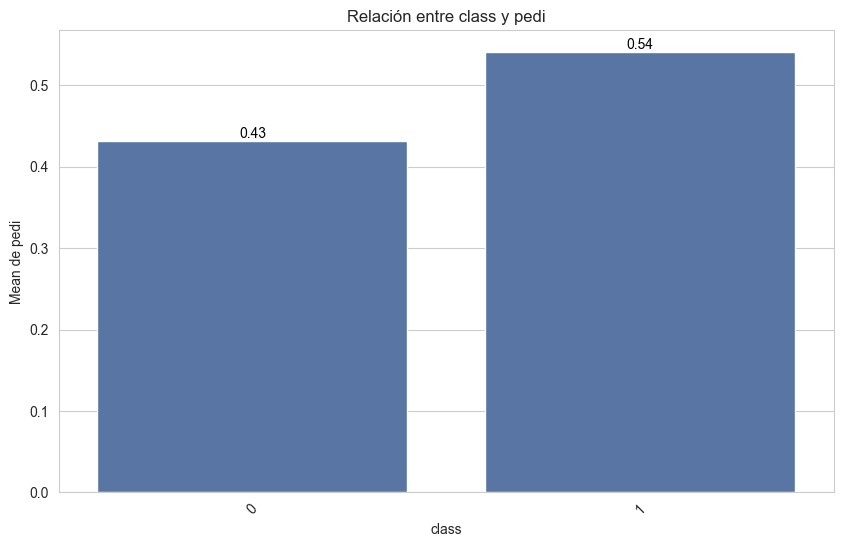

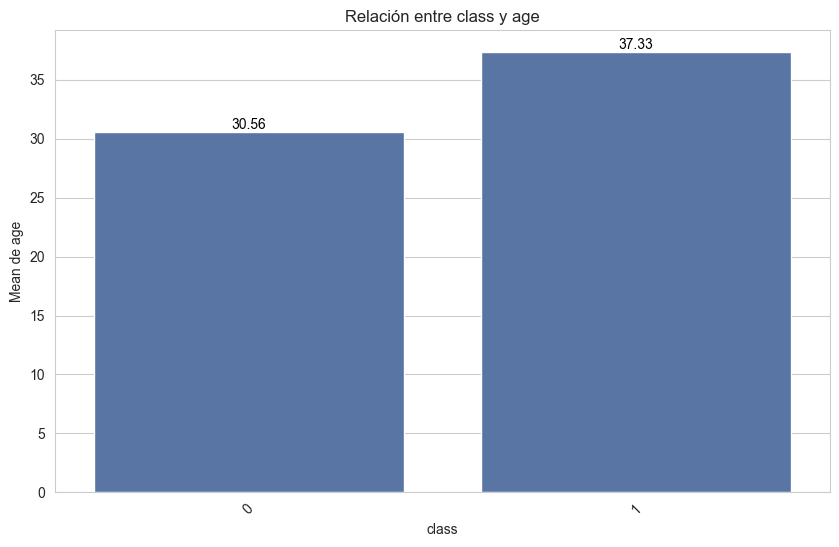

In [32]:
for col in num_col:
    bt.plot_categorical_numerical_relationship(train, target, col, show_values=True);

Parece que todas las columnas tienen relación con la variable target, así que de momento mantenemos todas.

In [33]:
features_num = num_col

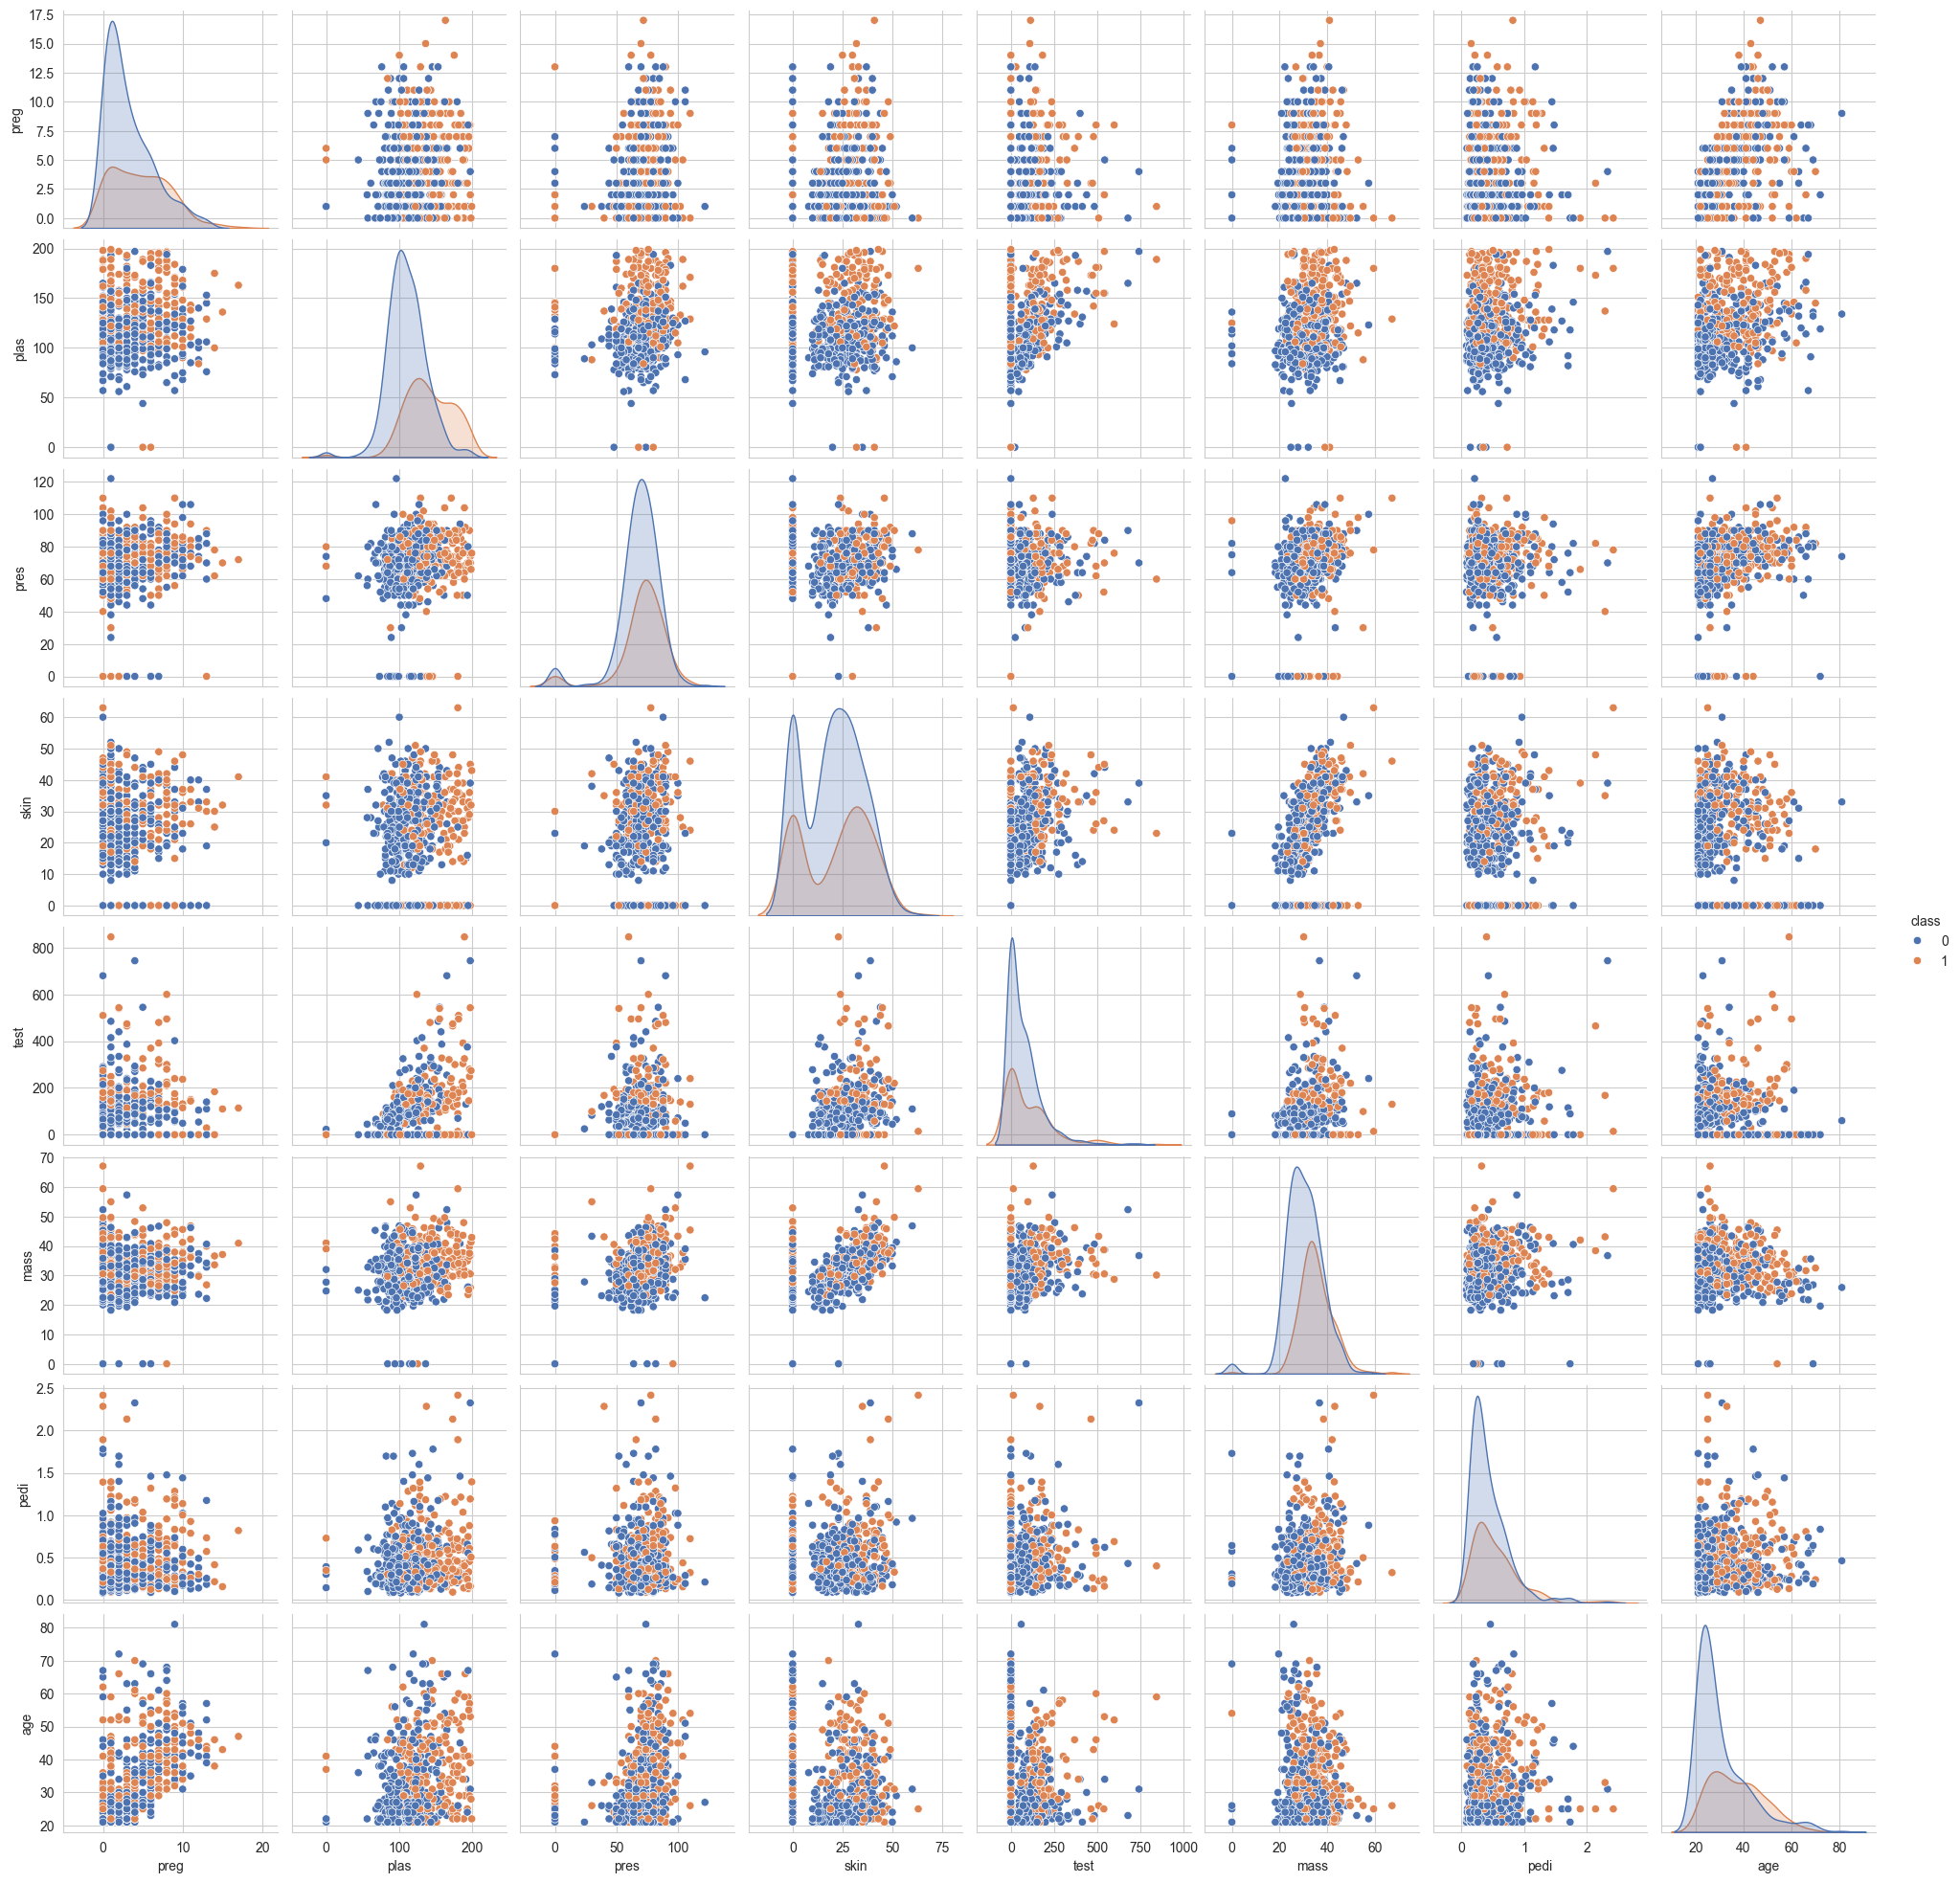

In [34]:
sns.pairplot(train, hue = target);

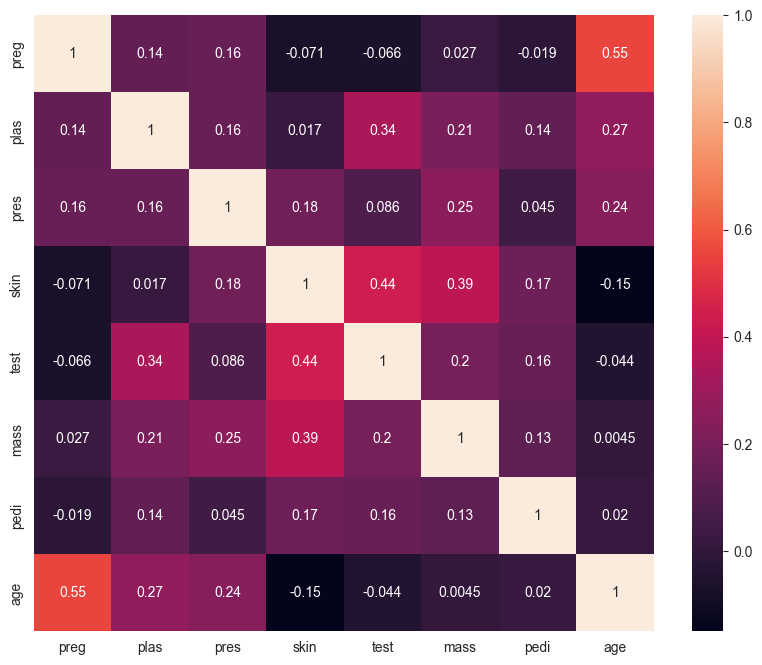

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(train[num_col].corr(), annot=True);

No vemos ninguna correlación exagerada entre variables, por lo que vamos a hacer dos posibles listas de features, una primera con todas las variables y otra con todas exceptuando age y skin.

In [36]:
features_num

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

In [37]:
features_num2 = features_num
features_num2.remove("age")
features_num2.remove("skin")
features_num2

['preg', 'plas', 'pres', 'test', 'mass', 'pedi']

In [38]:
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

Vamos a intentar optimizar 3 modelos, de los cuales eligiremos el que mejor métrica tenga. Como en nuestro problema de negocio, lo que más nos interesa es ser muy sensible a los sujetos con diabetes, buscaremos acertar mucho en los verdaderos positivos, es decir, tendremos que mirar el recall.

In [39]:
metricas_optimizadas = {}

In [40]:
### RandomForest
rf_clf = RandomForestClassifier()

params_grid = {
    "n_estimators": [100, 200, 400],
    "max_depth": [2, 4, 10],
    "min_samples_leaf": [10, 20, 40],
    "max_features": ["sqrt", "log2", None],
    "max_samples": [0.3, 0.6, 1],
    "class_weight": ["balanced", None]
}

rf_grid = RandomizedSearchCV(rf_clf, 
                               cv = 3,
                               n_iter = 25,
                               param_distributions = params_grid, 
                               scoring = "recall")


rf_grid.fit(X_train, y_train)
print("RF best_score:", rf_grid.best_score_)
metricas_optimizadas["RandomForest"] = rf_grid.best_score_

RF best_score: 0.7793427230046949


In [41]:
### XGBoost
xgb_clf = XGBClassifier()

params_grid = {'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
          }

xgb_grid = RandomizedSearchCV(xgb_clf, 
                               cv = 3,
                               n_iter = 25,
                               param_distributions= params_grid, 
                               scoring = "recall")


xgb_grid.fit(X_train, y_train)
print("XGB best_score:", xgb_grid.best_score_)
metricas_optimizadas["XGBoost"] = xgb_grid.best_score_

XGB best_score: 0.6572769953051644


In [42]:
### LightGBM 
lgb_clf = LGBMClassifier(verbose = -100)

params_grid= {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3, 0.6, 1],
          'feature_fraction': [0.5, 1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125, 250]
          }

lgb_grid = RandomizedSearchCV(lgb_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= params_grid, 
                               scoring = "recall")


lgb_grid.fit(X_train, y_train)
print("LGB best_score:", lgb_grid.best_score_)
metricas_optimizadas["LightGBM"] = lgb_grid.best_score_

LGB best_score: 0.647887323943662


In [43]:
print(metricas_optimizadas)

{'RandomForest': 0.7793427230046949, 'XGBoost': 0.6572769953051644, 'LightGBM': 0.647887323943662}


In [44]:
rf_grid_best = rf_grid.best_estimator_

Elegimos como modelo el RandomForest, ya que tiene el mejor recall de los tres modelos.

In [45]:
print(classification_report(y_test, rf_grid_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        99
           1       0.60      0.78      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.73      0.74       154

